### Recap

1. Read `unrate.csv` into a DataFrame and assign to `unrate`.
2. Use `Pandas.to_datetime()` to convert the `DATE` column into a Series of `datetime` values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

unrate = pd.read_csv('unrate.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


3. Generate a line chart that visualizes the unemployment rates from 1948:
- x-values should be the first 12 values in the `DATE` column
- y-values should be the first 12 values in the `VALUE` column
4. Use `pyplot.xticks()` to rotate the x-axis tick labels by `90` degrees.
5. Use `pyplot.xlabel()` to set the x-axis label to `"Month"`.
6. Use `pyplot.ylabel()` to set the y-axis label to `"Unemployment Rate"`.
7. Use `pyplot.title()` to set the plot title to `"Monthly Unemployment Trends, 1948"`.
8. Display the plot.

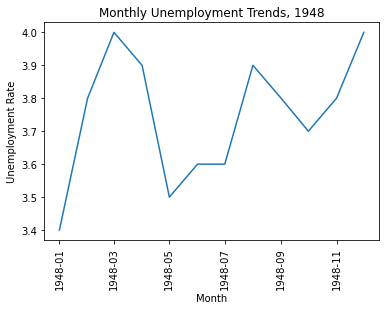

In [2]:
first_twelve = unrate[0:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")
plt.show();

### Adding Data

To generate a line chart within an Axes object, we need to call `Axes.plot()` and pass in the data you want plotted:

`x_values = [0.0, 0.5, 1.0]
y_values = [10, 20, 40]
ax1.plot(x_values, y_values)`

Like `pyplot.plot()`, the `Axes.plot()` will accept any iterable object for these parameters, including NumPy arrays and pandas Series objects. It will also generate a line chart by default from the values passed in. Each time we want to generate a line chart, we need to call `Axes.plot()` and pass in the data we want to use in that plot.

1. Create 2 line subplots in a 2 row by 1 column layout:
- In the top subplot, plot the data from 1948.
    - For the x-axis, use the first 12 values in the `DATE` column.
    - For the y-axis, use the first 12 values in the `VALUE` column.
- In the bottom subplot, plot the data from 1948.
    - For the x-axis, use the values from index 12 to 23 in the `DATE` column.
    - For the y-axis, use the values from index 12 to 23 in the `VALUE` column.
2. Use `plt.show()` to display all the plots.

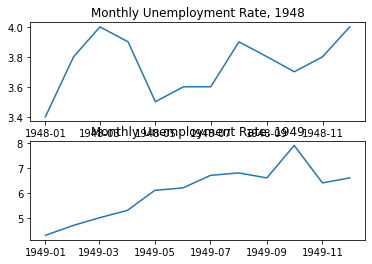

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')

plt.show()

### Formatting and Spacing

One issue with the 2 plots is that the x-axis ticks are unreadable. The other issue is that the plots are squeeze together vertically and hard to interpret. Even though now we generated two line charts, the total plotting area for the figure remained the same.

This is because matplotlib used the default dimensions for the total plotting area instead of resizing it to accommodate the plots. If we want to expand the plotting area, we have to specify this ourselves when we create the figure. To tweak the dimensions of the plotting area, we need to use the `figsize` parameter when we call `plt.figure()`:

This parameter takes in a tuple of floats:

`fig = plt.figure(figsize=(width, height))`

The unit for both width amd height values is inches. The `dpi` parameter, or dots per inch, and the `figsize` parameter determine how much space on your display a plot takes up. By increasing the width and the height of the plotting area, we can address both issues.

1. For the plot generated in the last exercise, set the width of the plotting area to `12` inches and the height to `5` inches.

In [4]:
# fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)

# ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
# ax1.set_title('Monthly Unemployment Rate, 1948')
# ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
# ax2.set_title('Monthly Unemployment Rate, 1949')

# plt.show()

### Comparing Across More Years

Instead of having to rotate the x-axis tick labels, we were able to horizontally extend the entire plotting area to make the labels more readable. Becuase the goal is to be able to look for any visual similarities between the lines in the plot, we want the space between the 2 plots to be as small as possible. If we had rotated the labels by 90 degrees instead, like we did in the last mission, we'd need to increase the spacing between the plots to keep them from overlapping. Expanding the plotting area horizontally improved the readability of the x-axis tick labels and minimized the amount of space between the 2 line charts.

If you recall, we generated these 2 line charts because we were interested in looking for any seasonality in the monthly unemployment trends. If you spend some time visually analyzing both line charts, you'll discover that there's no changes in unemployment trends that are occurring in the same month in both years.

On this screen, we're going to visualize data from a few more years to see if we find any evidence for seasonality between those years. Because we're going to need multiple years, we can use a loop so that we're not repeating unnecessary code. In order to generate values for the loop, we'll use Python's `range()` function, which produces a list of numbers.

We provide an integer argument to `range()`, and it produces a sequence of integers starting at zero, and going up to (but not including) the argument's value. As an example of how we can use this to produce plots, let's look at how we could produce a plot similar to the one on the previous screen using a loop and `range()`.

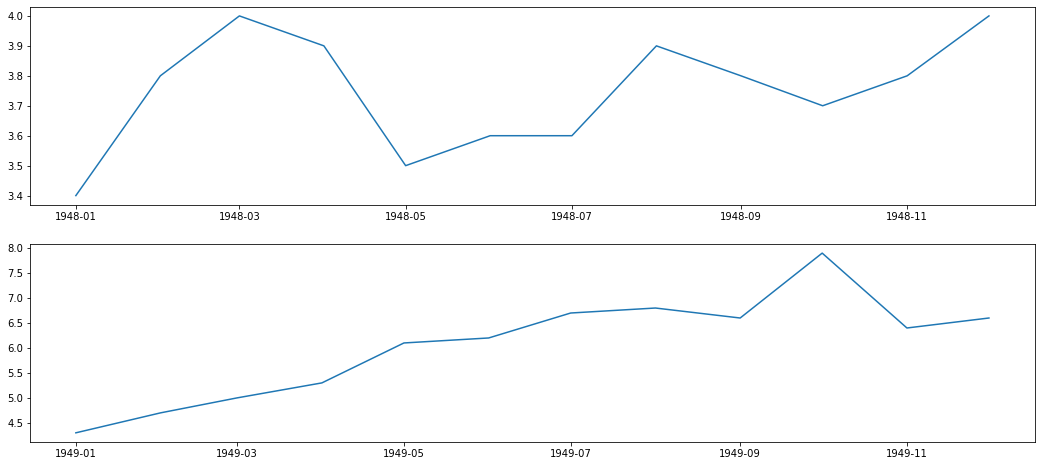

In [5]:
fig = plt.figure(figsize=(18,8))
for i in range(2):
    ax = fig.add_subplot(2,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])
    
plt.show()

1. Set thee width of the plotting area to `12` inches and the height to `12` inches.
2. Generate a grid with 5 rows and 1 column and plot data from the individual years. Start with 1948 in the top subplot and end with 1952 in the bottom subplot.
3. Use `plt.show()` to display the plots.

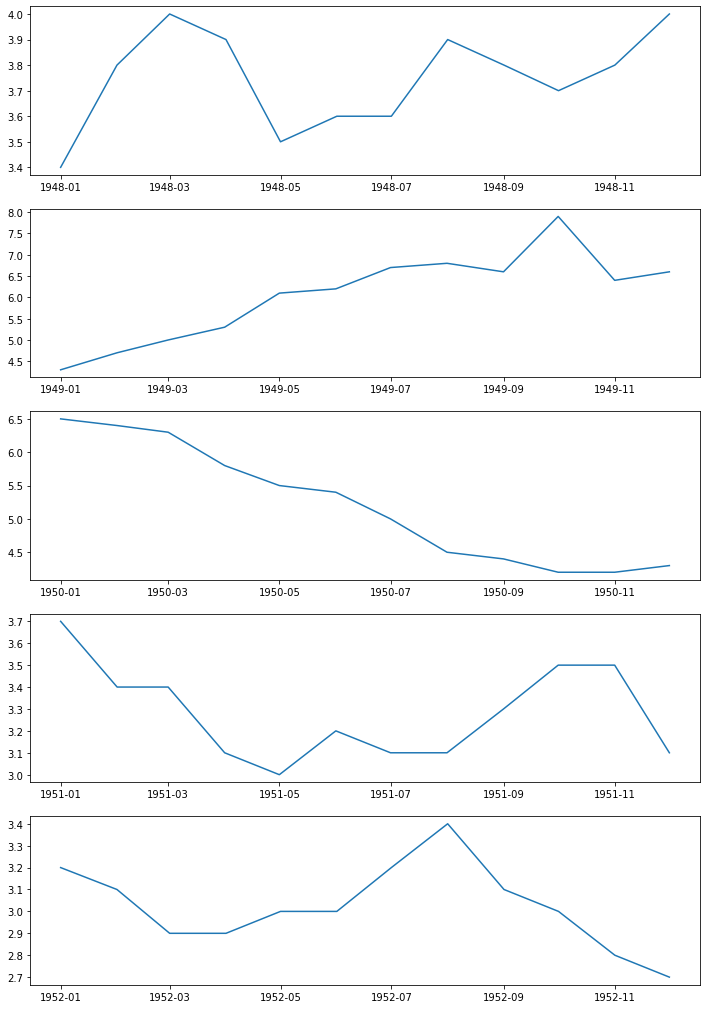

In [6]:
fig = plt.figure(figsize=(12,18))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])
    
plt.show()

### Overlaying Line Charts

By adding more line charts, we can look across more years for seasonal trends. This comes at a cost, unfortunately. We now have to cisually scan over more space, which is a limitation that we experienced when scanning the table representation of the same data. If you recall, one of the limitations of the table representations we discussed in the previous mission was the amount of time we'd have to spend scanning the table as the number of rows increased significantly.

We can handle the visual overhead each additional plot adds up by overlaying the line charts in a signle subplot. If we remove the years from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines. First we'll explore how to extract just the month values from the `DATE` column, then we'll dive into generating multiple plots ont he same coordinate grid.

To extract the month values from the `DATE` column and assign them to a new column, we can use the `pandas.Series.dt` accessor:

In [7]:
unrate['MONTH'] = unrate['DATE'].dt.month

calling `pandas.Series.dt.month` returns a Series containing the integer values for each month (e.g. `1` for January, `2` for February, etc.). Under the hood, pandas applies the `datetime.date.month` attribute from the `datetime.date` class over each datetime value in the `DATE` column, which returns the integer month value. Let's now move on to getting multiple line charts in the same subplot.

In the last mission, we called `pyplot.plot()` to generate a single line chart. Under the hood, matplotlib created a figure and a single subplot for this line chart. If we call `pyplot.plot()` multiple times, matplotlib will generate the line charts on the single subplot.

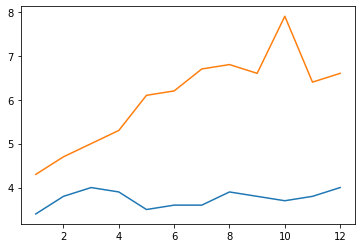

In [8]:
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])

If we want to set the dimensions for the plotting area, we can create the figure ourselves first then plot the data. This is because matplotlib first checks if a figure already exists before plotting data. It will only create one if we didn't create a figure.

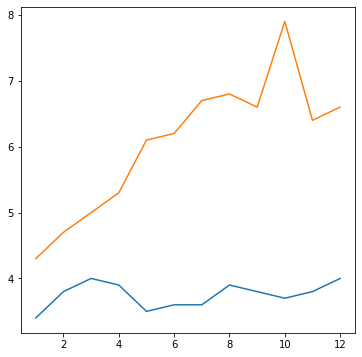

In [9]:
fit = plt.figure(figsize=(6,6))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])

By default, matplotlib will select a different color for each line. To specify the color ourselves, use the `c` parameter when calling `plot()`:

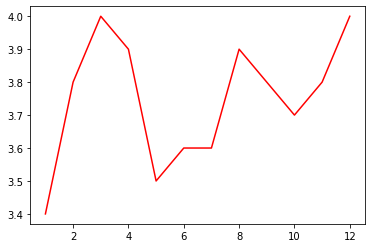

In [10]:
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')

1. Set the plotting area to a width of `6` inches and a height of `3` inches.
2. Generate 2 line charts in the base subplot, using the `MONTH` column for the x-axis instead of the `DATE` column:
- One line chart using data from 1948, with the line color set to `"red"`.
- One line chart using data from 1949, with th eline color set to `"blue"`.
3. Use `plt.show()` to display the plots.

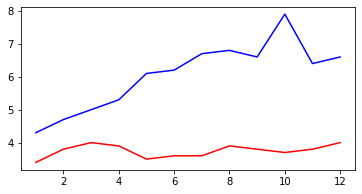

In [11]:
fig = plt.figure(figsize=(6,3))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c="red")
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c="blue")

plt.show()

### Adding More Lines

1. Set the plotting area to a width of `10` and a height of `6` inches.
2. Generate the following plots in the base subplot:
- 1948: set the line color to `"red"`
- 1949: set the line color to `"blue"`
- 1950: set the line color to `"green"`
- 1951: set the line color to `"orange"`
- 1952: set the line color to `"black"`
3. Use `plt.show()` to display the plots.

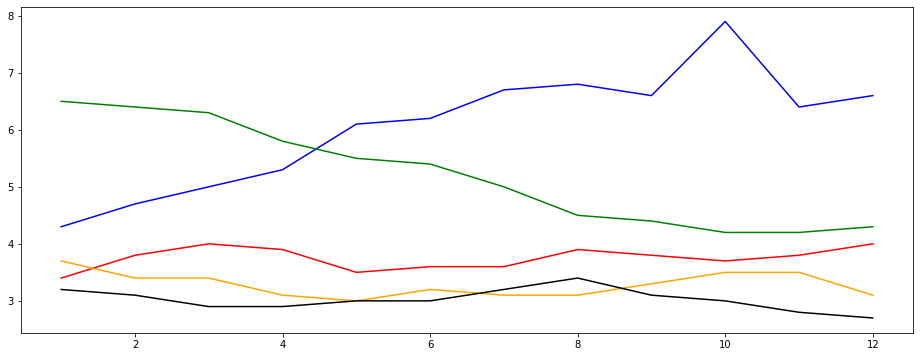

In [12]:
fig = plt.figure(figsize=(16,6))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c="red")
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c="blue")
plt.plot(unrate[24:36]['MONTH'], unrate[24:36]['VALUE'], c="green")
plt.plot(unrate[36:48]['MONTH'], unrate[36:48]['VALUE'], c="orange")
plt.plot(unrate[48:60]['MONTH'], unrate[48:60]['VALUE'], c="black")

plt.show()

### Adding a Legend

By plotting all of the lines in one coordinate grid, we got a different perspective on the data. The main thing that sticks out is how the blue and green lines span a larger range of y-values (4% to 8% for blue and 4% to 7% for green) while the 3 plots below them mostly range only between 3% and 4%. You can tell from the last sentence that we don't know which line corresponds to which year, because the x-axis now only reflects the month values.

To help remind us which year each line corresponds to, we can add a **legend** that links each color to the year the line is representing.

When we generate each line chart, we need to specify the text label we want each color linked to. The `pyplot.plot` function contains a `label` parameter, which we use to set the year value:

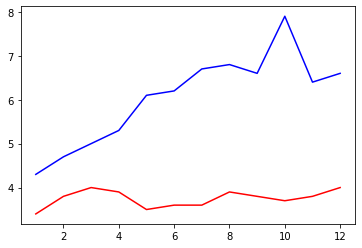

In [13]:
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red', label='1948')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue', label='1949')

We can create the legend using `pyplot.legend()` and specify its location using the `loc` parameter:

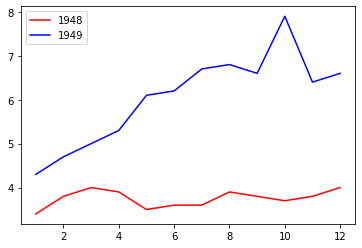

In [14]:
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red', label='1948')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue', label='1949')
plt.legend(loc="upper left")

If we're instead working with multiple subplots, we can create a legend for each subplot by mirroring the steps for each subplot. When we use `plt.plot()` and `plt.legend()`, the `Axes.plot()` and `Axes.legend()` methods are called under the hood and parameters passed to the calls. When we need to create a legend for each subplot, we can use `Axes.legend()` instead.

1. Modify the code from the last screen that overlaid 5 plots to include a legend.
2. Use the year value for each line chart as the label.
- E.g. the plot of 1948 data that uses `"red"` for the line color should be labeled `"1948"` in the legend.
3. Place the legend in the `"upper left"` corner of the plot.
4. Display the plot using `plt.show()`.

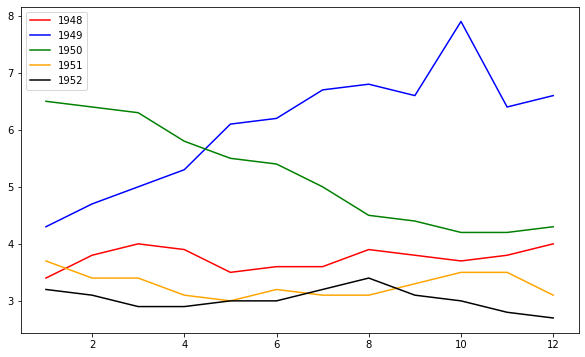

In [17]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')

plt.show()

### Final Tweaks

Let's enhance the visualization by adding a title and labels for both axes. To set the title, we use `pyplot.title()` and pass in a string value:

`plt.title("Monthly Unemployment Trends, 1948-1952")`

To set the x-axis and y-axis labels, we use `pyplot.xlabel()` and `pyplot.ylabel()`. Both of these functions accept string values.

1. Modify the code from the last screen.
- Set the title to `"Monthly Unemployment Trends 1948-1952"`.
- Set the x-axis label to `"Month, Integer"`.
- Set the y-axis label to `"Unemployment Rate, Percent"`.

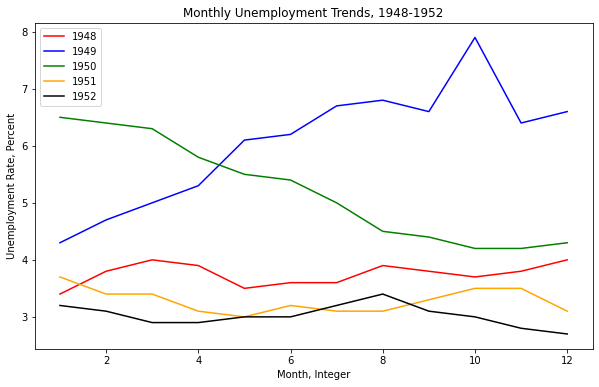

In [18]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.show()